In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# From a list of tuple 2D plot a simple graph
def linear_graph(tuples_list, x_label, y_label, title):
    # Extract x and y values from the list of tuples
    x_values, y_values = zip(*tuples_list)
    # Create a line plot
    plt.plot(x_values, y_values, marker='o', linestyle='-')
    # Add labels and a title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # Show the plot
    plt.show()
    
# Plot moving average from a list of tuples
def moving_average(tuples_list, x_axis_name='Time', y_axsis_name='Reward', title='Moving average plot', window_size=3):
    # Check of good inputs
    if not isinstance(x_axis_name, str) or not isinstance(y_axsis_name, str) or not isinstance(title, str) :
        raise ValueError("Input x_name, y_name, title must be a string")
    if not isinstance(tuples_list, list):
        raise ValueError("Input must be a list")
    for item in tuples_list:
        if not isinstance(item, tuple) or len(item) != 2:
            raise ValueError("Each element in the list must be a 2D tuple (tuple with two elements)")
    
    # Extract x and y values into separate lists
    x_values, y_values = zip(*tuples_list)

    # Calculate the moving average using numpy
    moving_avg = np.convolve(y_values, np.ones(window_size)/window_size, mode='valid')

    # Create a new list of x values for the moving average
    x_avg = x_values[(window_size-1)//2 : -(window_size-1)//2]

    # Plot the original data points
    plt.scatter(x_values, y_values, label='Original Data', marker='o')

    # Plot the moving average
    plt.plot(x_avg, moving_avg, label=f'Moving Average (Window Size {window_size})', color='red')

    # Add labels and legend
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axsis_name)
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.title(title)
    plt.show()
    
def tuple_list_from_csv(filename):
    """plot moving average and std of a pandas dataframe
    Args:
        filename (_type_): _description_
    """
    
    df = pd.read_csv(filename)
    
    f_name = df.columns[0]
    s_name = df.columns[1]
    
    # Set the window size for the moving average and std calculation
    window_size = 200  # You can adjust this value

    # Calculate the moving average using Pandas rolling function
    df['MovingAverage'] = df[s_name].rolling(window=window_size, center=True).mean()

    # Calculate the standard deviation using Pandas rolling function
    df['StdDeviation'] = df[s_name].rolling(window=window_size,center=True).std()

    # Create a plot using Seaborn and Matplotlib
    plt.figure()
    sns.scatterplot(x=f_name, y=s_name, data=df, label='Raw Data', color='blue',alpha=0.1)
    sns.lineplot(x=f_name, y='MovingAverage', data=df, label='Moving Average', color='red')

    # Fill the area between MovingAverage - StdDeviation and MovingAverage + StdDeviation with a shaded region
    plt.fill_between(df[f_name], df['MovingAverage'] - df['StdDeviation'], df['MovingAverage'] + df['StdDeviation'], alpha=0.4, color='green', label='Std Deviation')

    # Customize the plot
    plt.xlabel('Episode')
    plt.ylabel(s_name)
    plt.title(f'{s_name}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    # Show the plot
    plt.show()

    
def compare_with_random(filename, filename2):
    """plot moving average and std of a pandas dataframe
    Args:
        filename (_type_): _description_
    """
    
    df = pd.read_csv(filename)
    df2 = pd.read_csv(filename2)
    f_name = df.columns[0]
    s_name = df.columns[1]
    f_name2 = df2.columns[0]
    s_name2 = df2.columns[1]
    
    # Set the window size for the moving average and std calculation
    window_size = 200  # You can adjust this value

    # Calculate the moving average using Pandas rolling function
    df['MovingAverage'] = df[s_name].rolling(window=window_size, center=True).mean()

    # Calculate the standard deviation using Pandas rolling function
    df['StdDeviation'] = df[s_name].rolling(window=window_size,center=True).std()

    
    # Calculate the moving average using Pandas rolling function
    df2['MovingAverage'] = df2[s_name2].rolling(window=window_size, center=True).mean()

    # Calculate the standard deviation using Pandas rolling function
    df2['StdDeviation'] = df2[s_name2].rolling(window=window_size,center=True).std()
    
    print(df2)
    # Create a plot using Seaborn and Matplotlib
    plt.figure()
    sns.lineplot(x=f_name, y='MovingAverage', data=df, label='Moving Average Model', color='red')
    # Fill the area between MovingAverage - StdDeviation and MovingAverage + StdDeviation with a shaded region
    plt.fill_between(df[f_name], df['MovingAverage'] - df['StdDeviation'], df['MovingAverage'] + df['StdDeviation'], alpha=0.4, color='green', label='Std Deviation Model')

    sns.lineplot(x=f_name2, y='MovingAverage', data=df2, label='Moving Average Random', color='black')
    # Fill the area between MovingAverage - StdDeviation and MovingAverage + StdDeviation with a shaded region
    plt.fill_between(df2[f_name2], df2['MovingAverage'] - df2['StdDeviation'], df2['MovingAverage'] + df2['StdDeviation'], alpha=0.4, color='blue', label='Std Deviation Random')
    # Customize the plot
    plt.xlabel('Episode')
    plt.ylabel(s_name)
    plt.title(f'{s_name}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    # Show the plot
    plt.show()

In [2]:

filename = '../results/FF_Qlearning/logs/FF_DQL_10_full_training/'

import pandas as pd

# Initialize an empty dictionary to store the DataFrames
dataframes = {}

# Iterate through the file names and read them into DataFrames
for i in range(10):  # Assuming you have files from 0 to 9
    filename = filename + f"reward_config_{i}_10000.csv"
    df = pd.read_csv(filename)
    dataframes[f"{i}"] = df

FileNotFoundError: [Errno 2] No such file or directory: '../results/FF_Qlearning/logs/FF_DQL_10_full_training/reward_config_0_10000.csvreward_config_1_10000.csv'

In [3]:


import pandas as pd

# Initialize an empty dictionary to store the DataFrames
dataframes = {}
filename_1 = '../results/FF_Qlearning/logs/FF_DQL_10_full_training/'

# Iterate through the file names and read them into DataFrames
for i in range(10):  # Assuming you have files from 0 to 9
    filename = filename_1 + f"reward_config_{i}_10000.csv"
    df = pd.read_csv(filename)
    dataframes[f"{i}"] = df

In [4]:
dataframes

{'0':      episode_R  Reward Evolution
 0            0              26.0
 1            1              29.0
 2            2              20.0
 3            3              26.0
 4            4              20.0
 ..         ...               ...
 295        295              59.0
 296        296              69.0
 297        297              63.0
 298        298              42.0
 299        299              55.0
 
 [300 rows x 2 columns],
 '1':      episode_R  Reward Evolution
 0            0              16.0
 1            1              12.0
 2            2              17.0
 3            3              38.0
 4            4              16.0
 ..         ...               ...
 295        295             453.0
 296        296              31.0
 297        297              15.0
 298        298              60.0
 299        299             181.0
 
 [300 rows x 2 columns],
 '2':      episode_R  Reward Evolution
 0            0              55.0
 1            1              45.0
 2           

In [5]:
combined_df = pd.DataFrame()

# Iterate through the keys (0, 1, 2, ... 9)
for key in sorted(dataframes.keys()):
    df = dataframes[key]  # Get the DataFrame for each key
    df = df.rename(columns={"Reward Evolution": f"reward_{key}"})  # Rename the 'Reward Evolution' column
    combined_df = pd.concat([combined_df, df["reward_" + key]], axis=1)  # Concatenate the 'Reward Evolution' column

# Add the 'episode_R' column from any of the DataFrames to the combined DataFrame
combined_df["episode_R"] = dataframes["0"]["episode_R"]

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

In [6]:
combined_df

reward_0  reward_1  reward_2  reward_3  reward_4  reward_5  reward_6  \
0        26.0      16.0      55.0      14.0      10.0      15.0      16.0   
1        29.0      12.0      45.0      12.0       8.0      42.0      18.0   
2        20.0      17.0       9.0      23.0      57.0      16.0      10.0   
3        26.0      38.0      21.0      21.0      18.0      12.0      10.0   
4        20.0      16.0      16.0      13.0      16.0       9.0      30.0   
..        ...       ...       ...       ...       ...       ...       ...   
295      59.0     453.0      39.0      63.0      28.0      29.0     473.0   
296      69.0      31.0      52.0      31.0      52.0      40.0      69.0   
297      63.0      15.0      13.0      55.0      84.0      49.0     285.0   
298      42.0      60.0       8.0      54.0      69.0      29.0     145.0   
299      55.0     181.0      40.0      36.0      30.0      50.0      53.0   

     reward_7  reward_8  reward_9  episode_R  
0        39.0      32.0      18.0          0  
1        15.0      45.0      10.0          1  
2        23.0      14.0      13.0          2  
3        12.0      17.0       9.0          3  
4        10.0      59.0      14.0          4  
..        ...       ...       ...        ...  
295      64.0     500.0      22.0        295  
296      38.0      37.0      51.0        296  
297      57.0      67.0      29.0        297  
298      66.0      39.0      26.0        298  
299      50.0      47.0      24.0        299  

[300 rows x 11 columns]

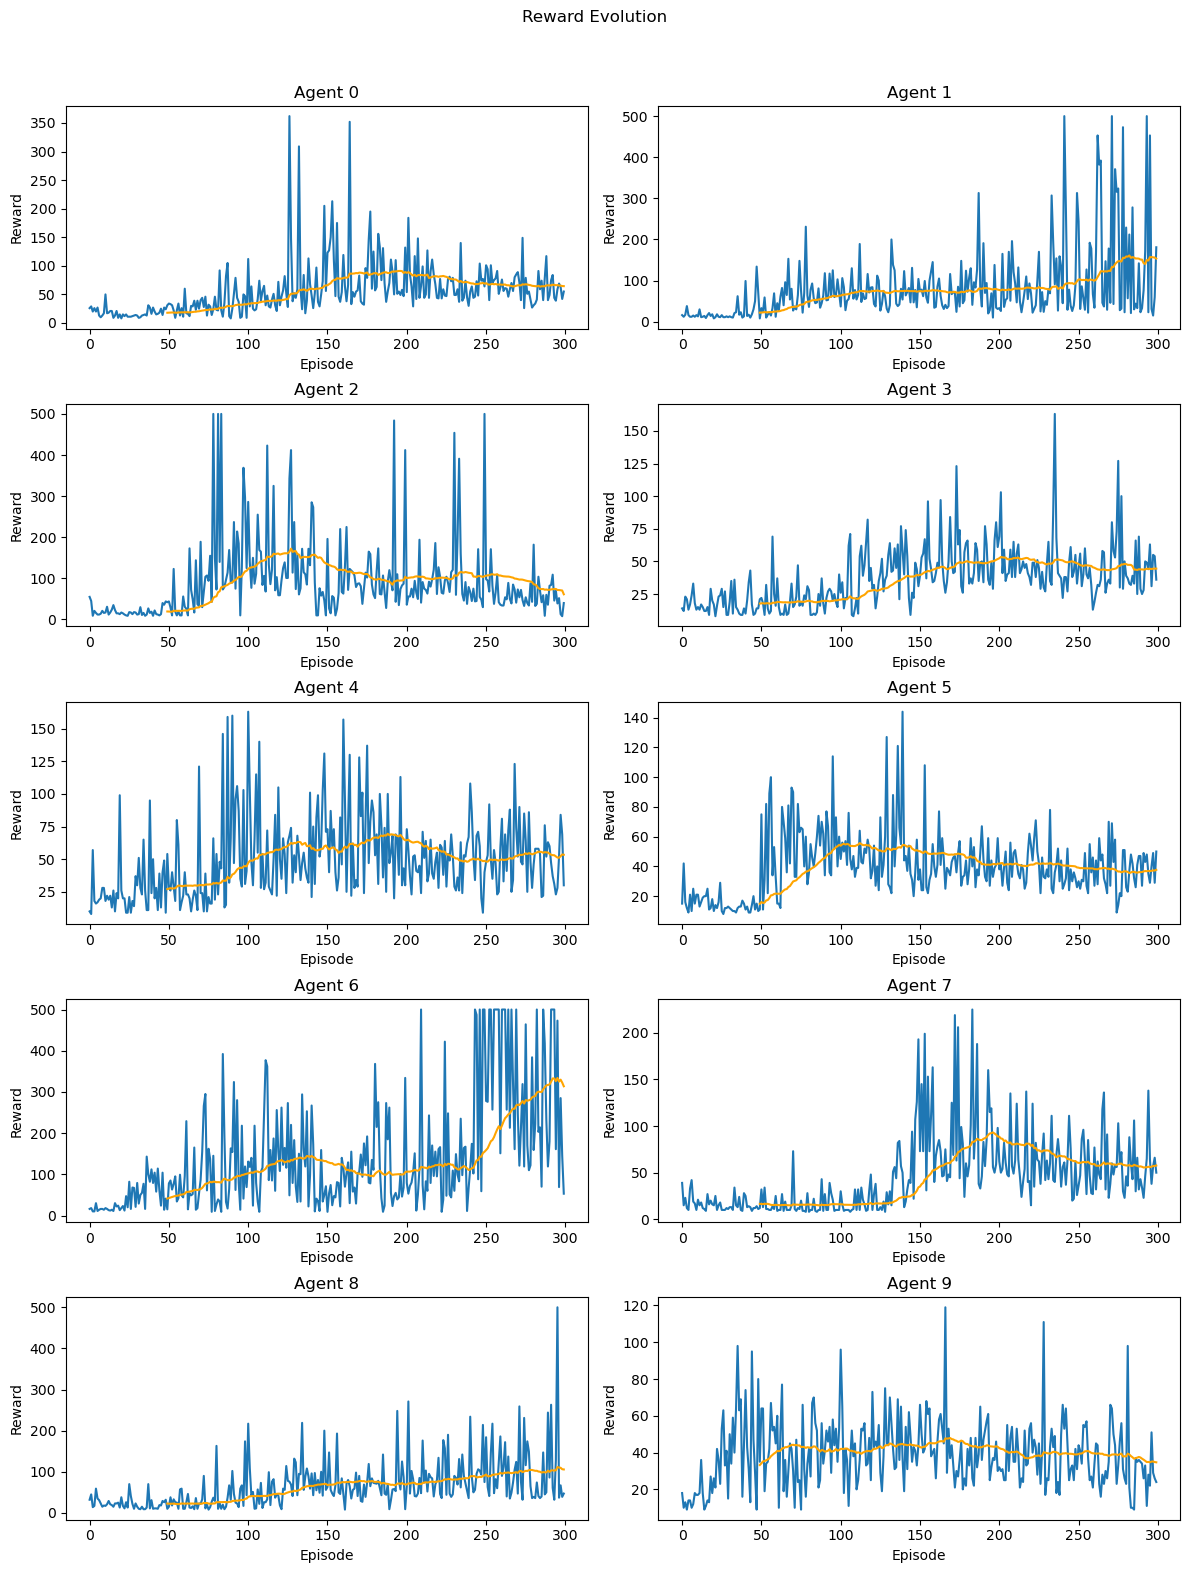

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a 'combined_df' DataFrame with columns 'episode_R', 'reward_0', 'reward_1', ..., 'reward_9'

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(combined_df['episode_R'], combined_df[f'reward_{i}'], label=f'Agent {i}')
    ax.set_title(f'Agent {i}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    
    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50).mean()
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

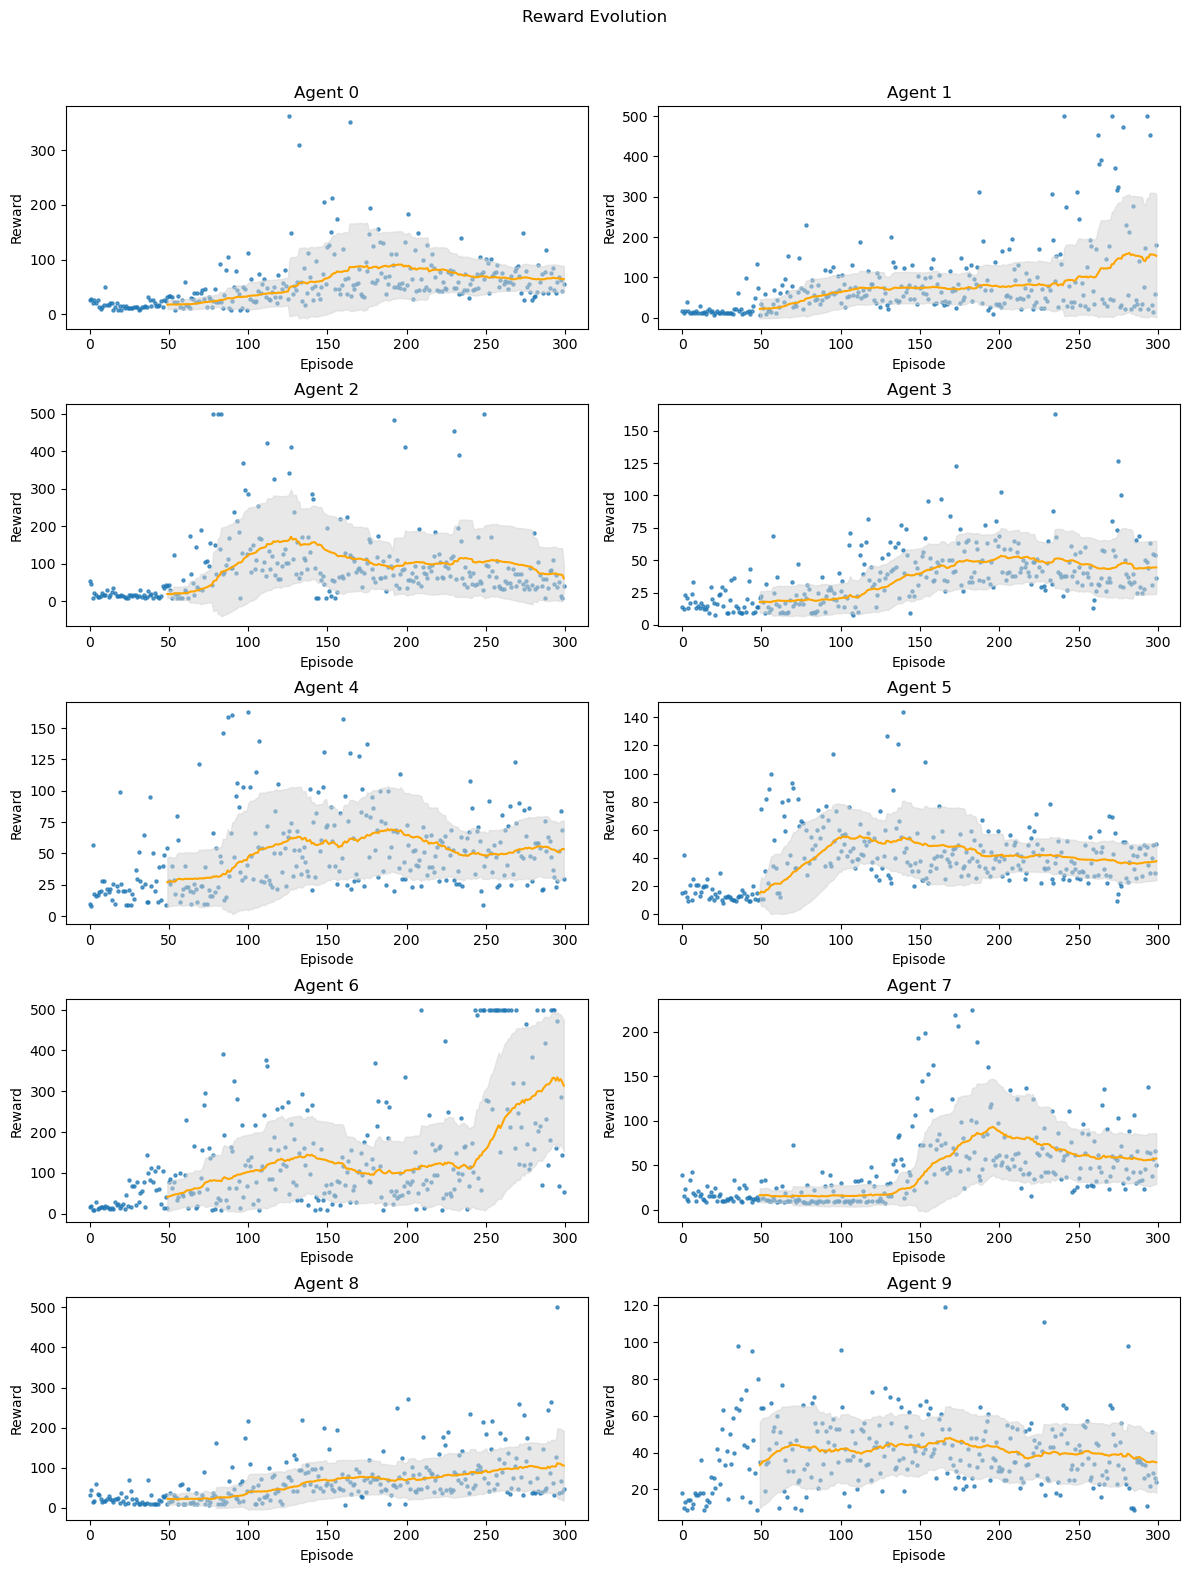

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Agent {i}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



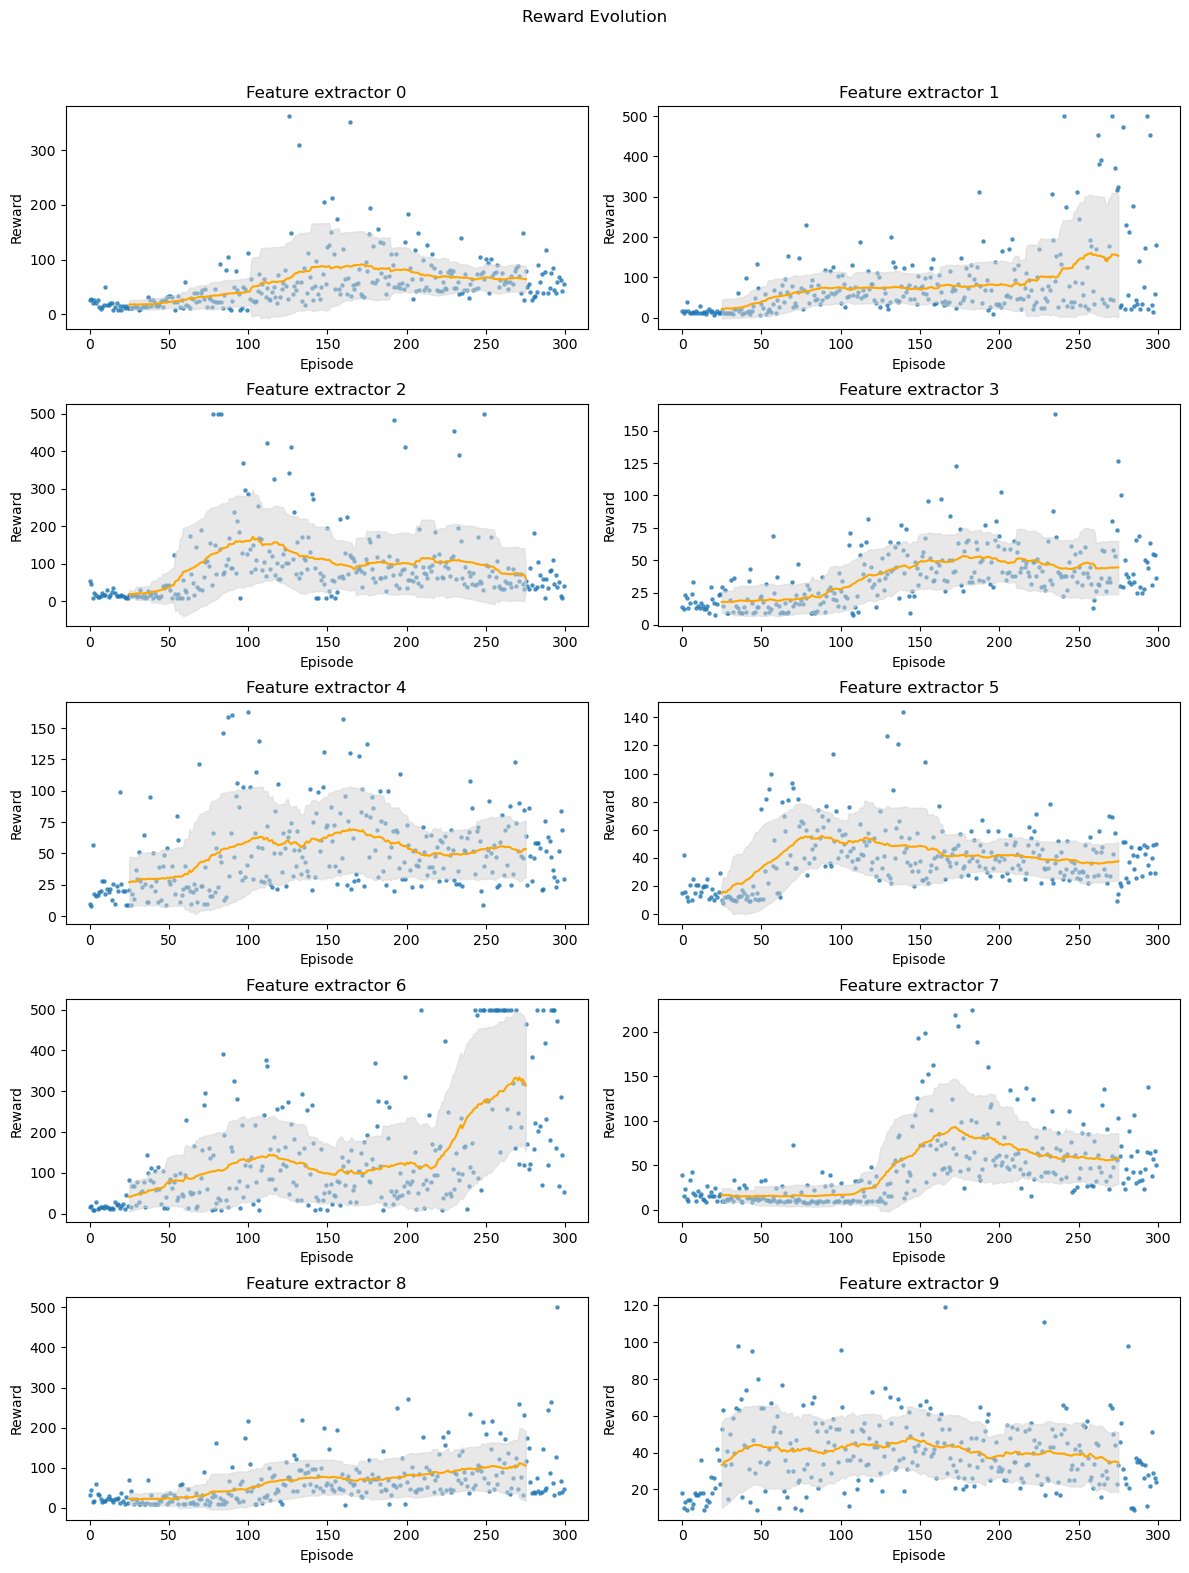

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50,center=True).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50,center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



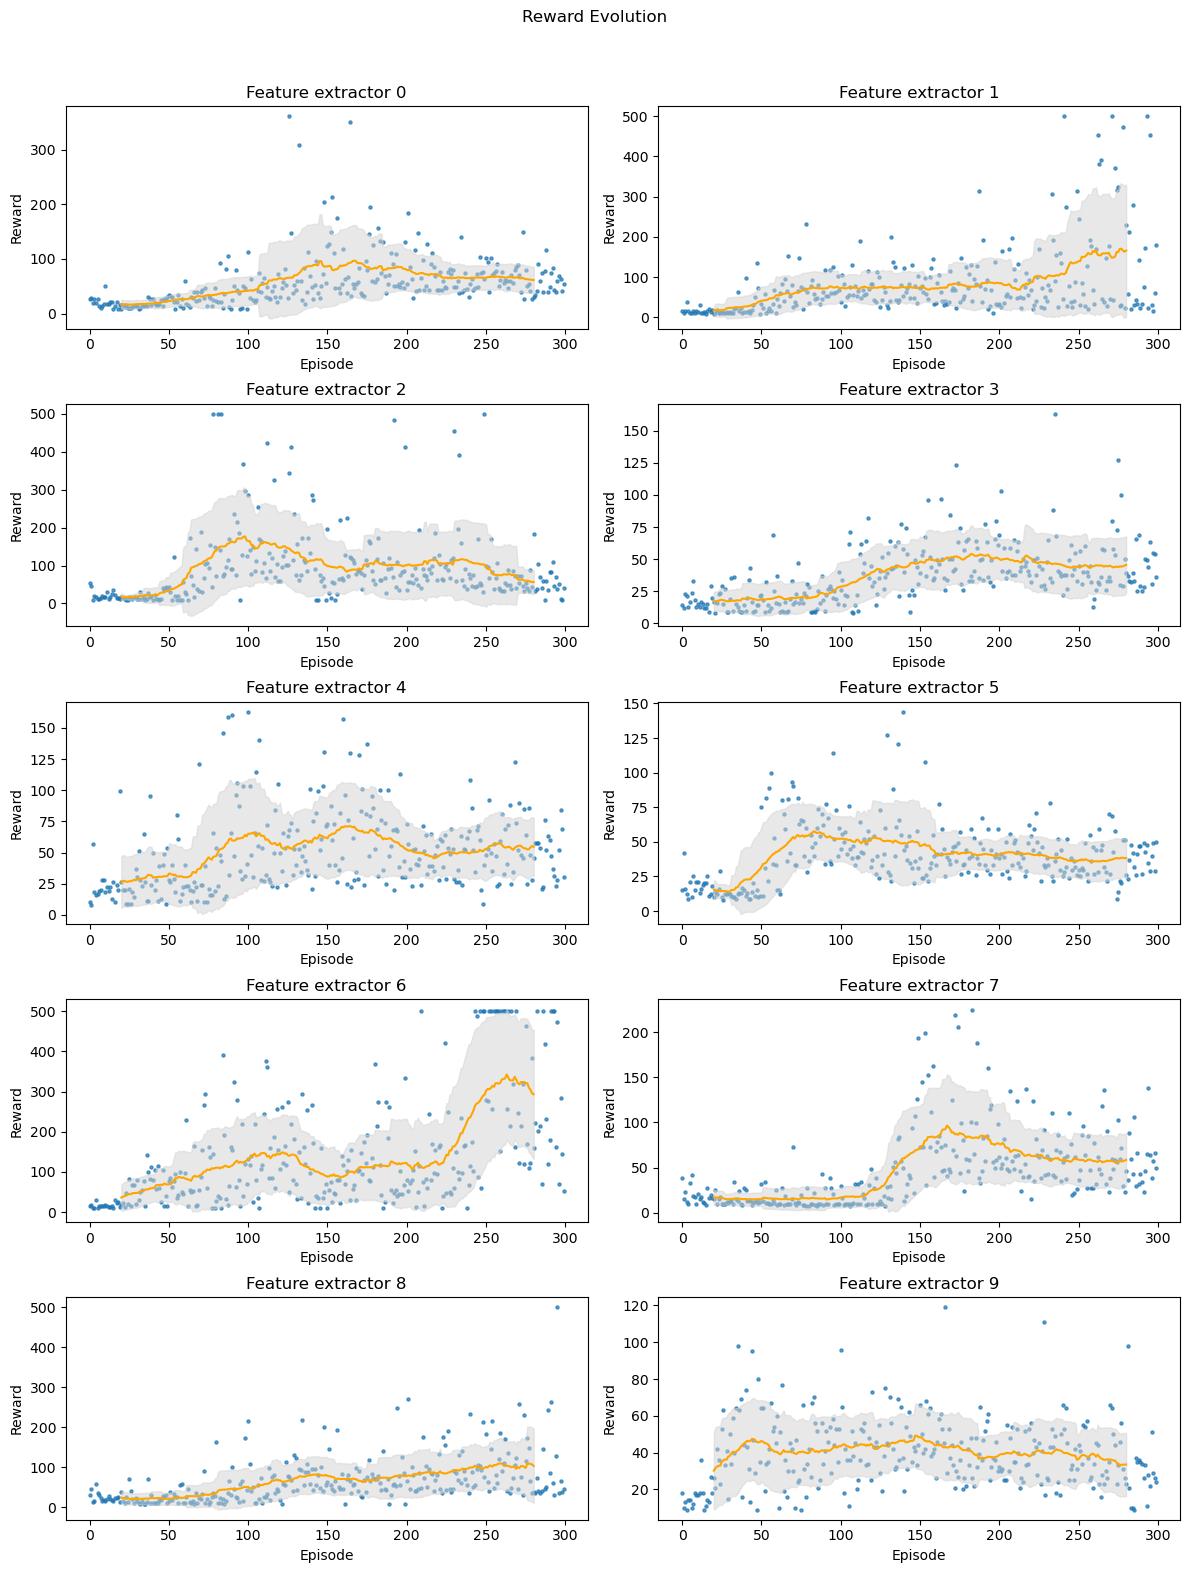

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40,center=True).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40,center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - 0.5*standard deviation and the moving average + 0.5*standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - 0.5 * moving_std, moving_avg + 0.5 * moving_std, color='lightgray', alpha=0.5)

# Common x and y labels
fig.text(0.5, 0.04, 'Episode', ha='center')
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical')

# Add a single legend for all subplots
for i in range(5):
    for j in range(2):
        axes[i, j].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


SyntaxError: '[' was never closed (<ipython-input-11-6a4da9c8a111>, line 10)

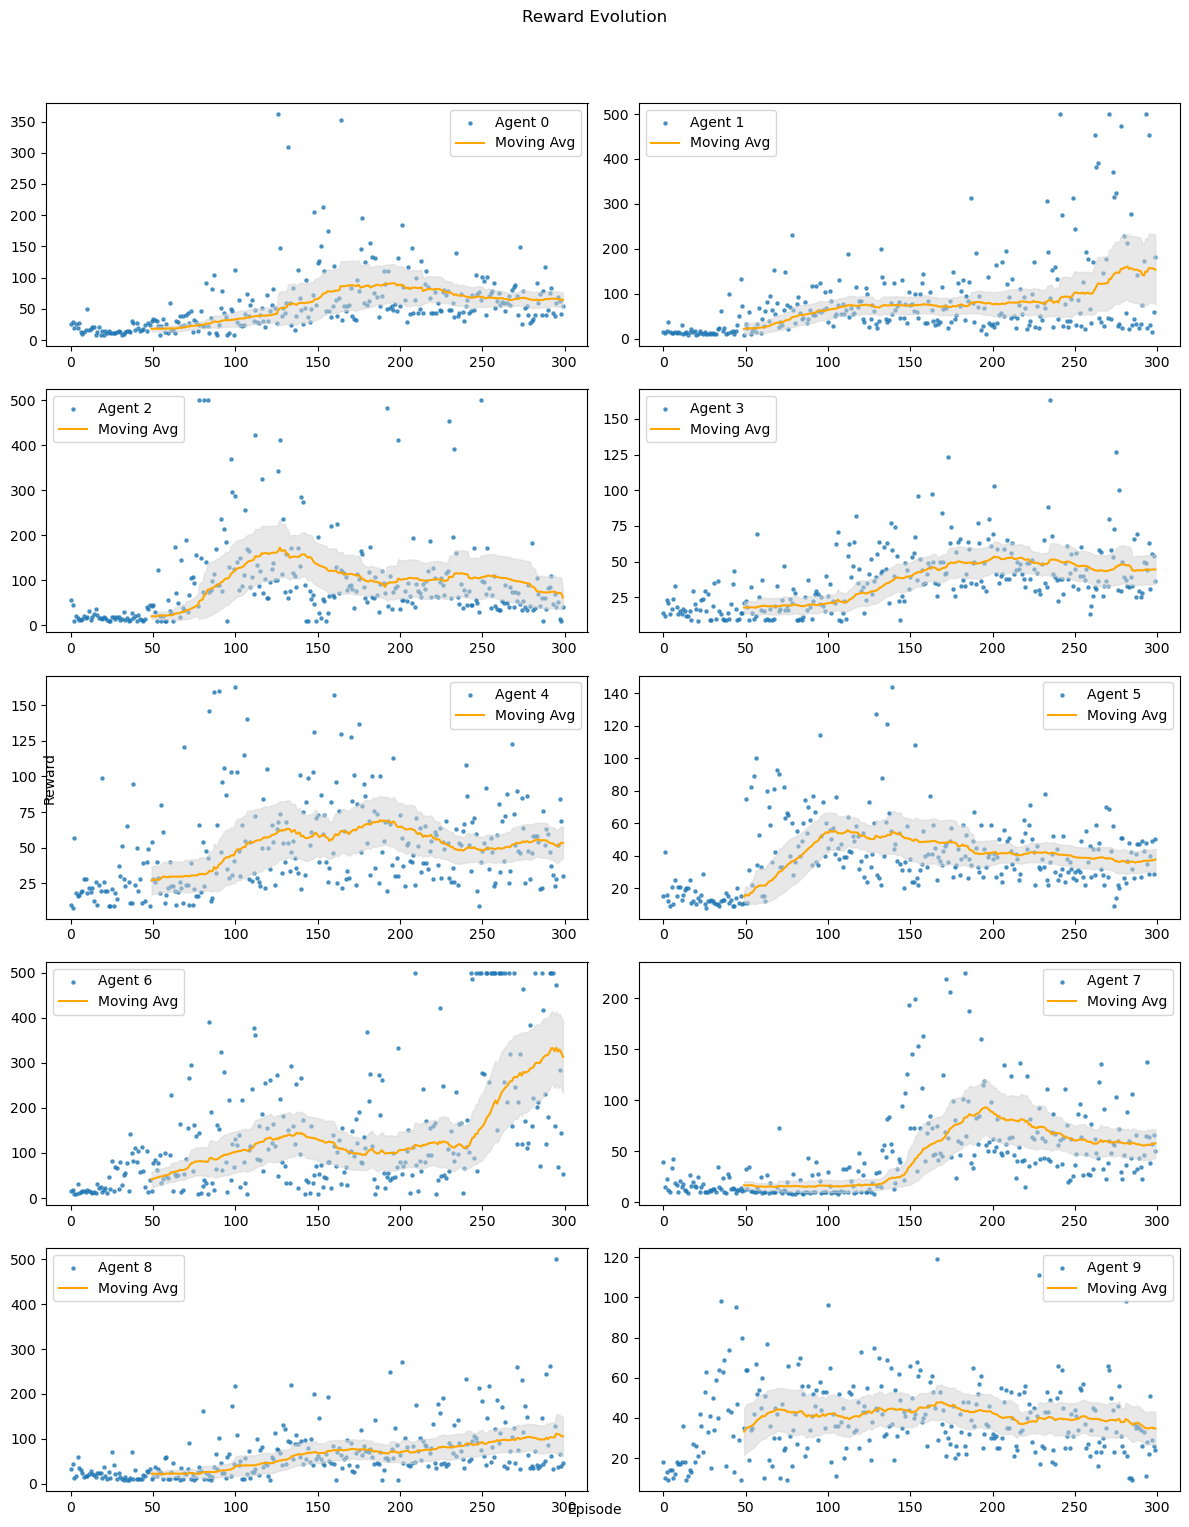

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - 0.5*standard deviation and the moving average + 0.5*standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - 0.5 * moving_std, moving_avg + 0.5 * moving_std, color='lightgray', alpha=0.5)

# Common x and y labels
fig.text(0.5, 0.04, 'Episode', ha='center')
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical')

# Add a single legend for all subplots
for i in range(5):
    for j in range(2):
        axes[i, j].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


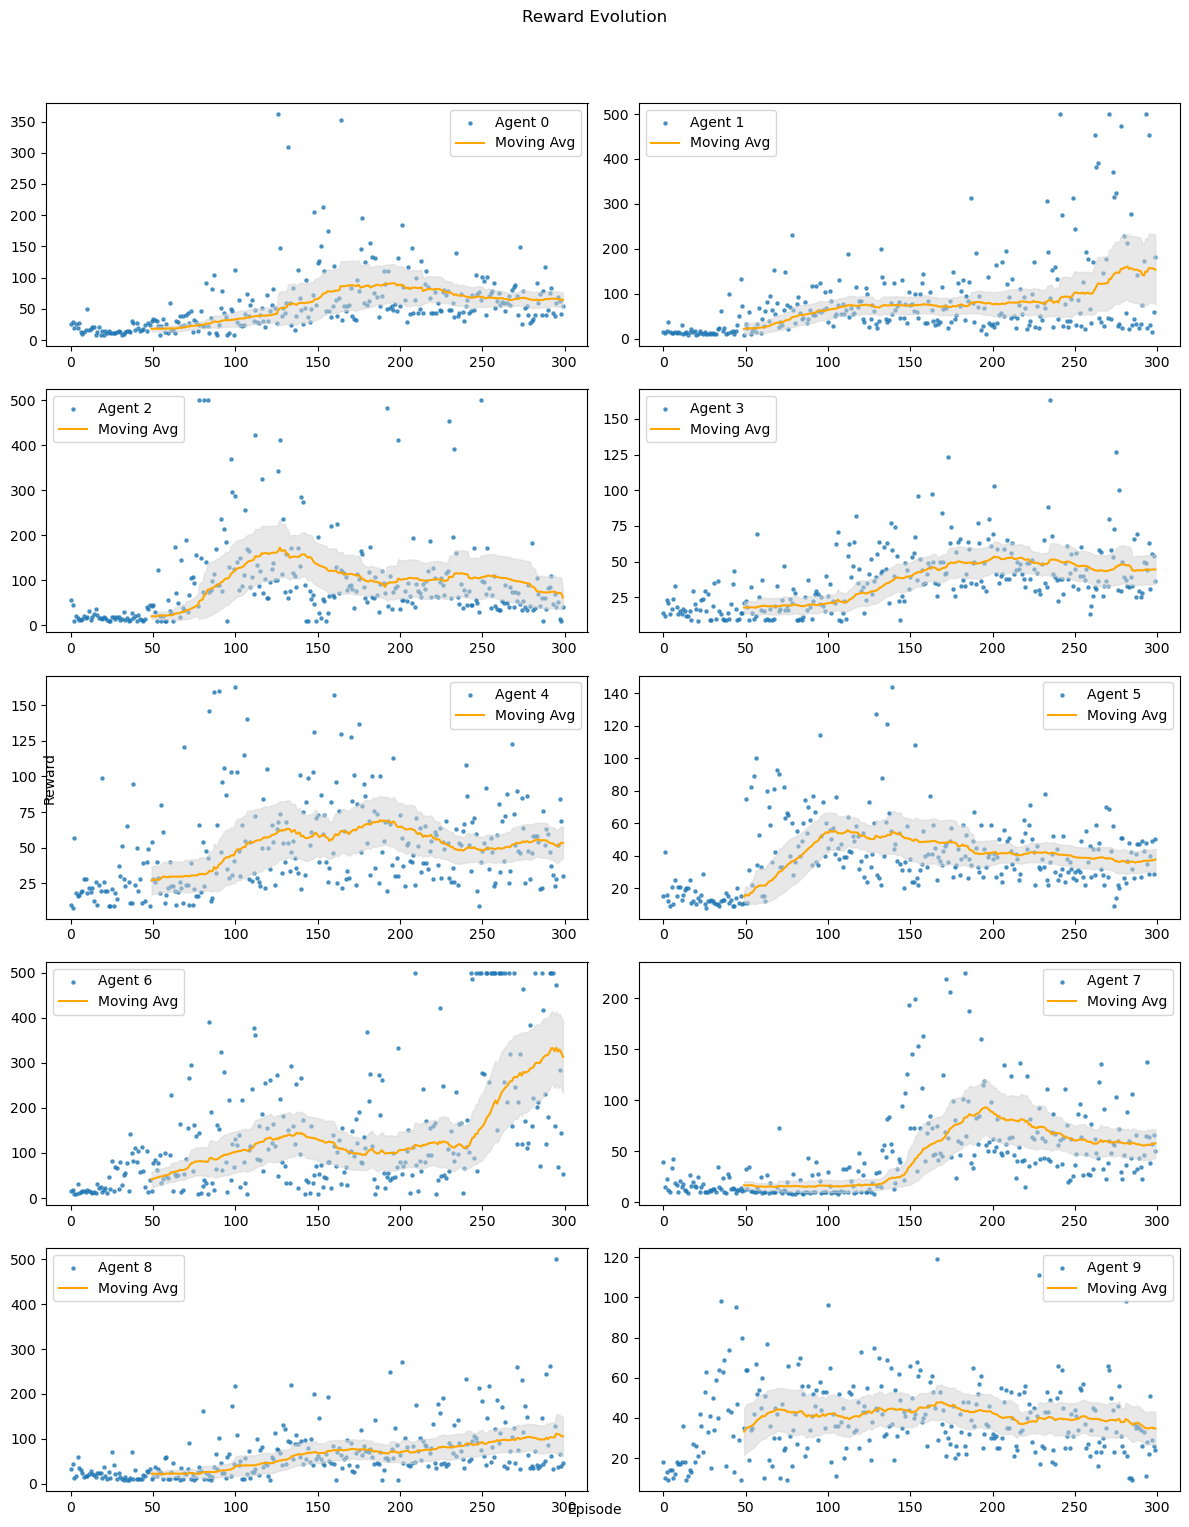

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution")

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - 0.5*standard deviation and the moving average + 0.5*standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - 0.5 * moving_std, moving_avg + 0.5 * moving_std, color='lightgray', alpha=0.5)

# Common x and y labels (added to the figure)
fig.text(0.5, 0.04, 'Episode', ha='center')
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical')

# Add a single legend for all subplots
for i in range(5):
    for j in range(2):
        axes[i, j].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


AttributeError: 'Text' object has no property 'fontize'

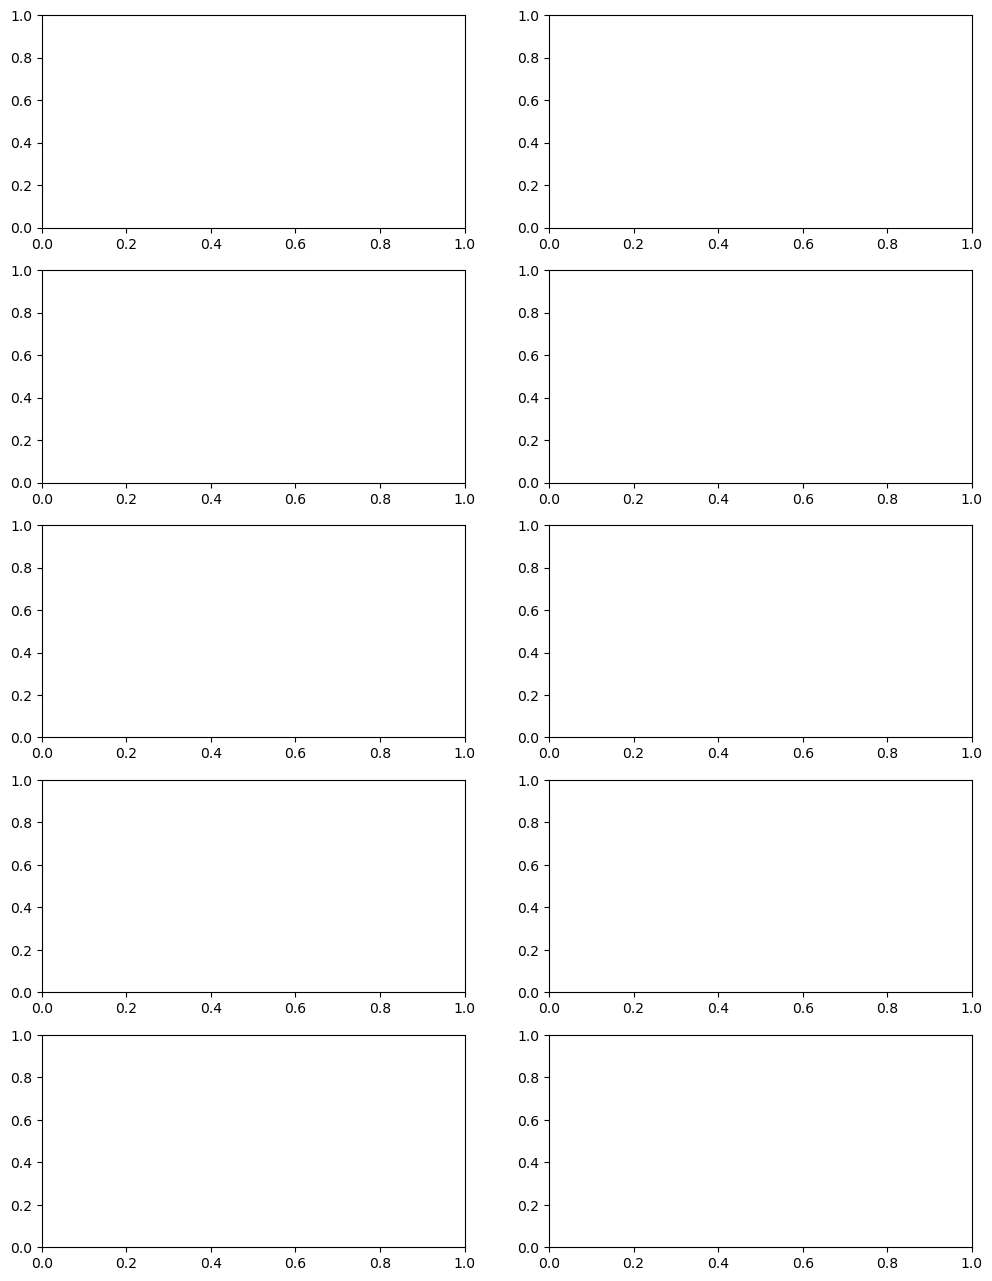

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontize=12)

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50,center=True).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50,center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

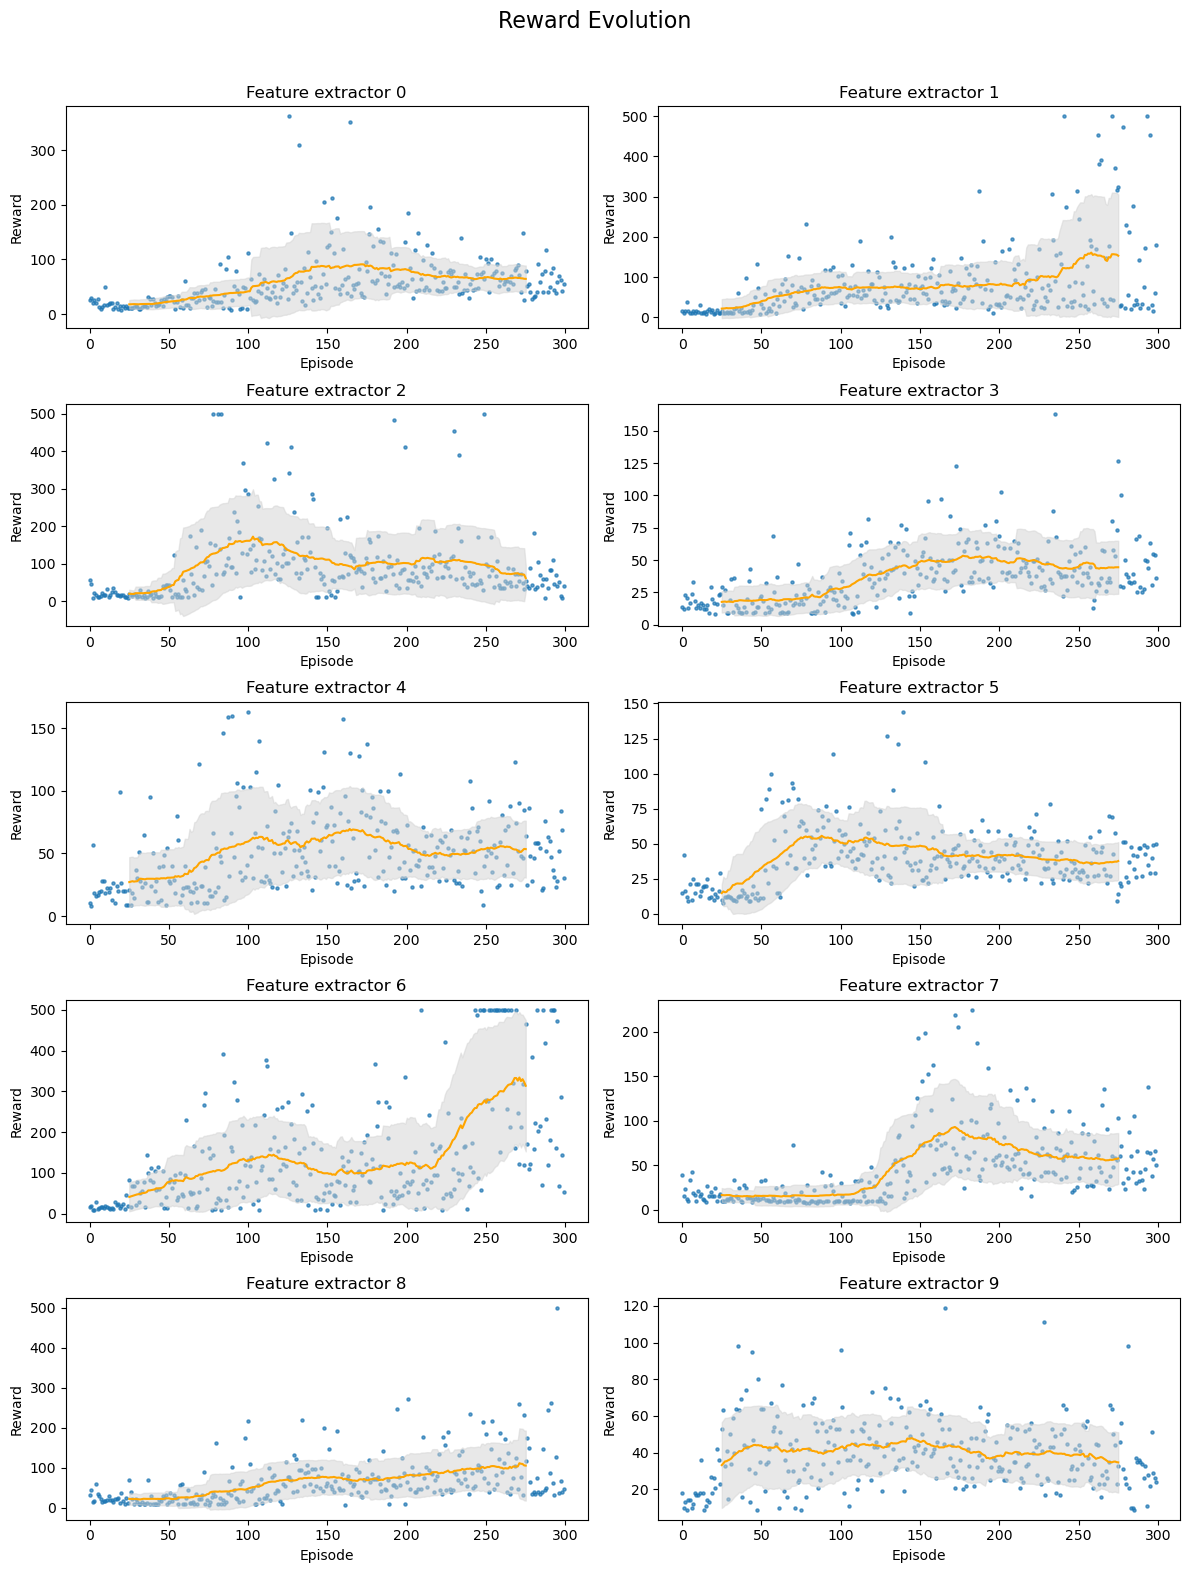

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=16)

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 50 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=50,center=True).mean()

    # Calculate the moving standard deviation with a window of 50 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=50,center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=16)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, 0.04, 'Episode', ha='center', fontsize=14)  # X-axis label
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical', fontsize=14)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


SyntaxError: '[' was never closed (<ipython-input-16-c5bc0b113b4e>, line 14)

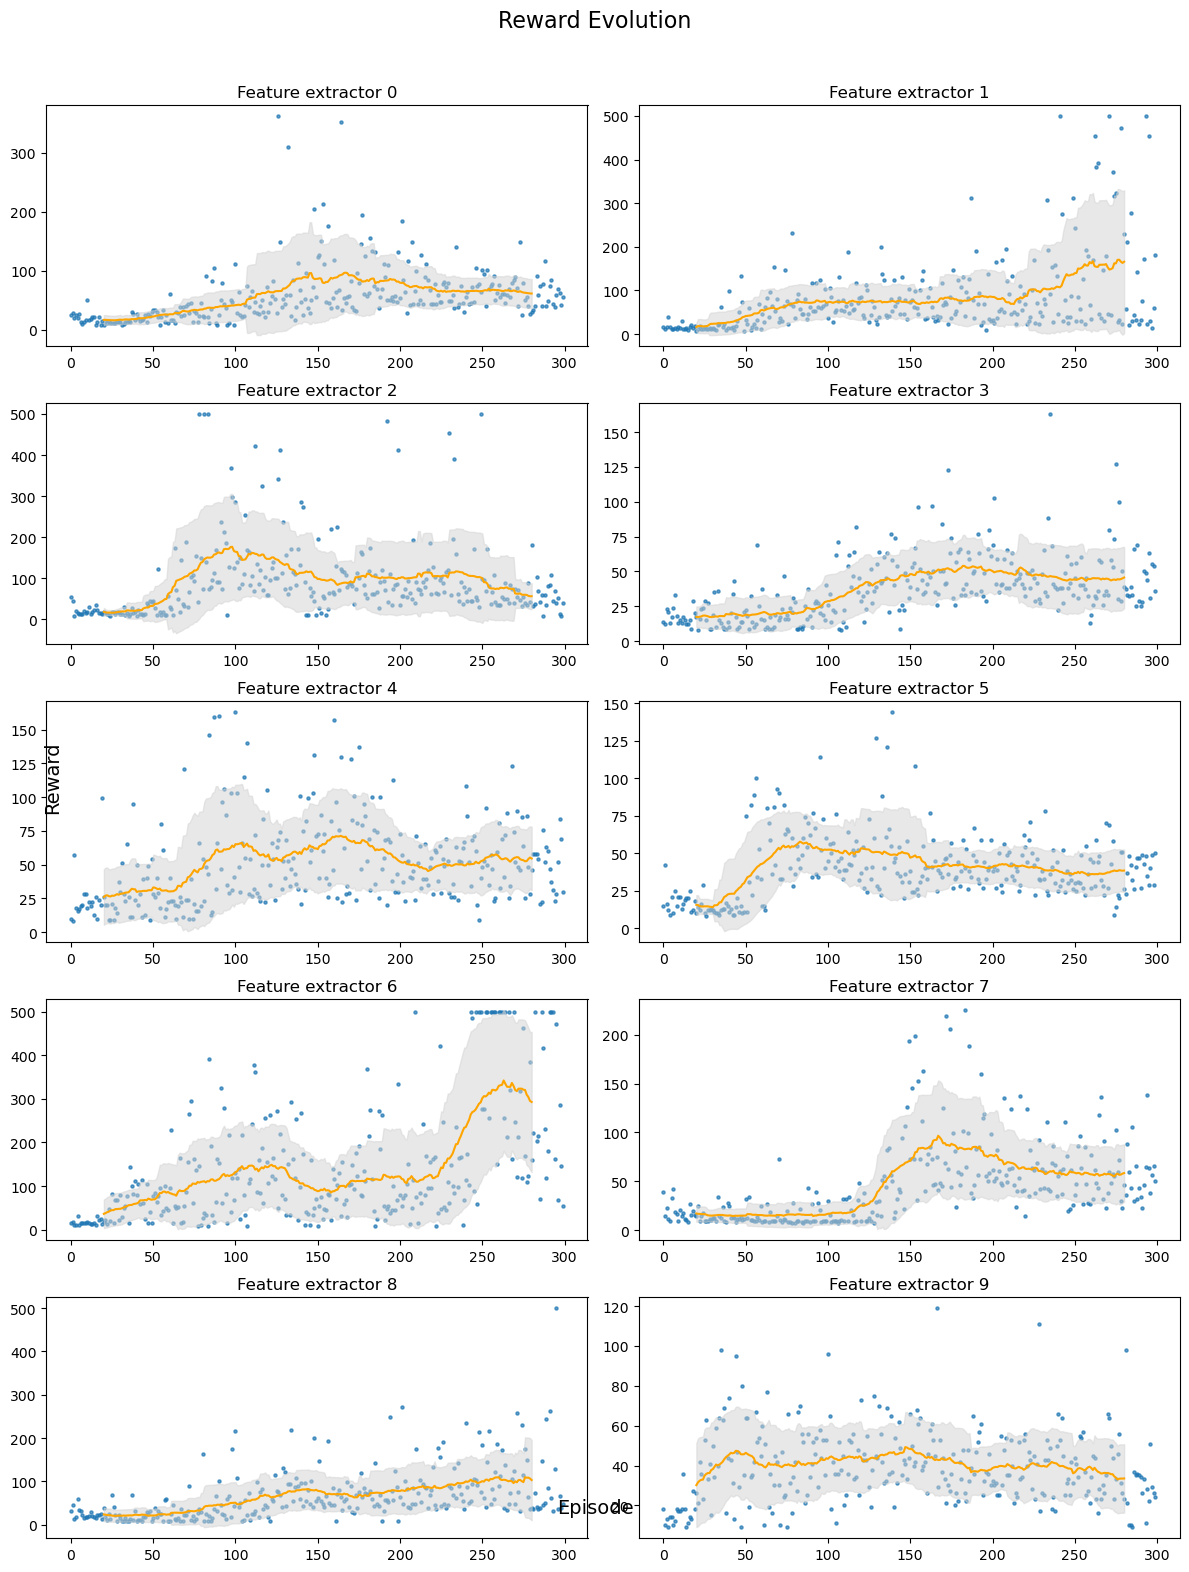

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=16)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, 0.04, 'Episode', ha='center', fontsize=14)  # X-axis label
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical', fontsize=14)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


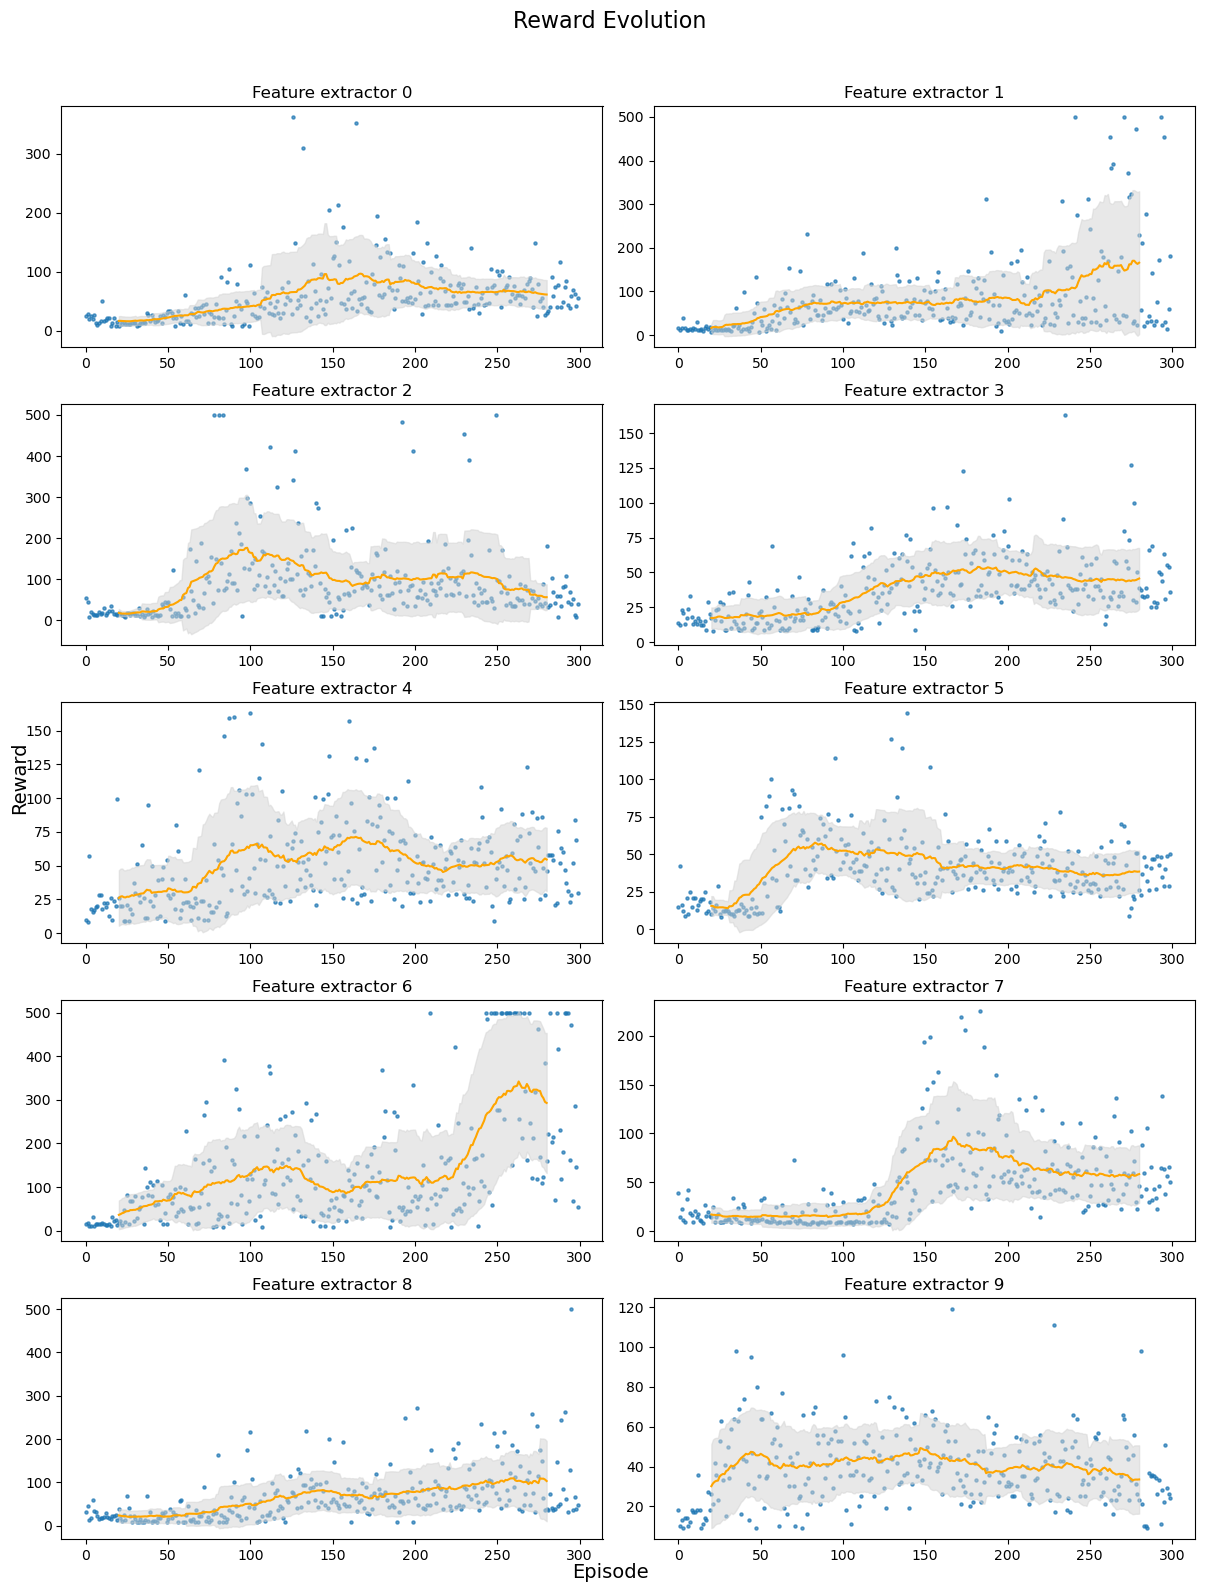

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=16)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, 0.0, 'Episode', ha='center', fontsize=14)  # X-axis label
fig.text(0.0, 0.5, 'Reward', va='center', rotation='vertical', fontsize=14)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


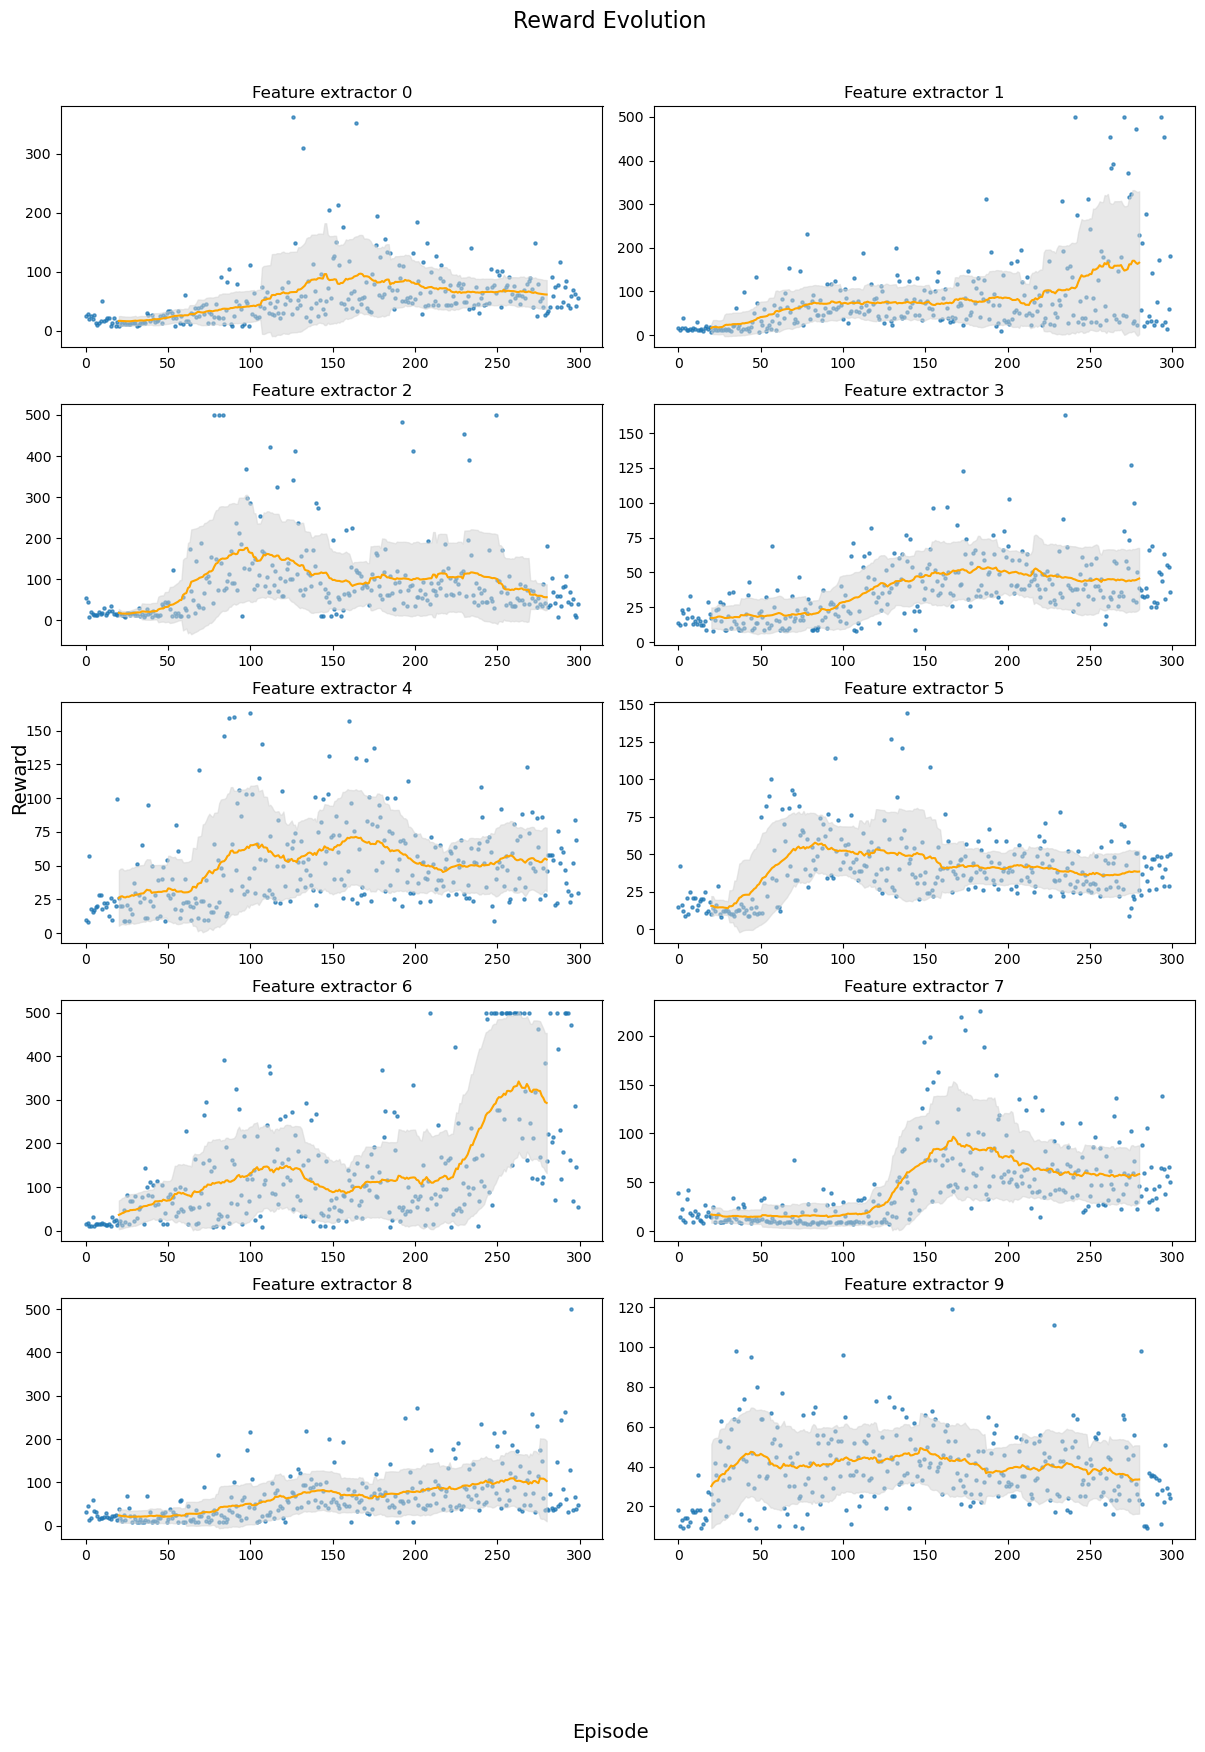

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=16)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, -0.1, 'Episode', ha='center', fontsize=14)  # X-axis label
fig.text(0.0, 0.5, 'Reward', va='center', rotation='vertical', fontsize=14)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


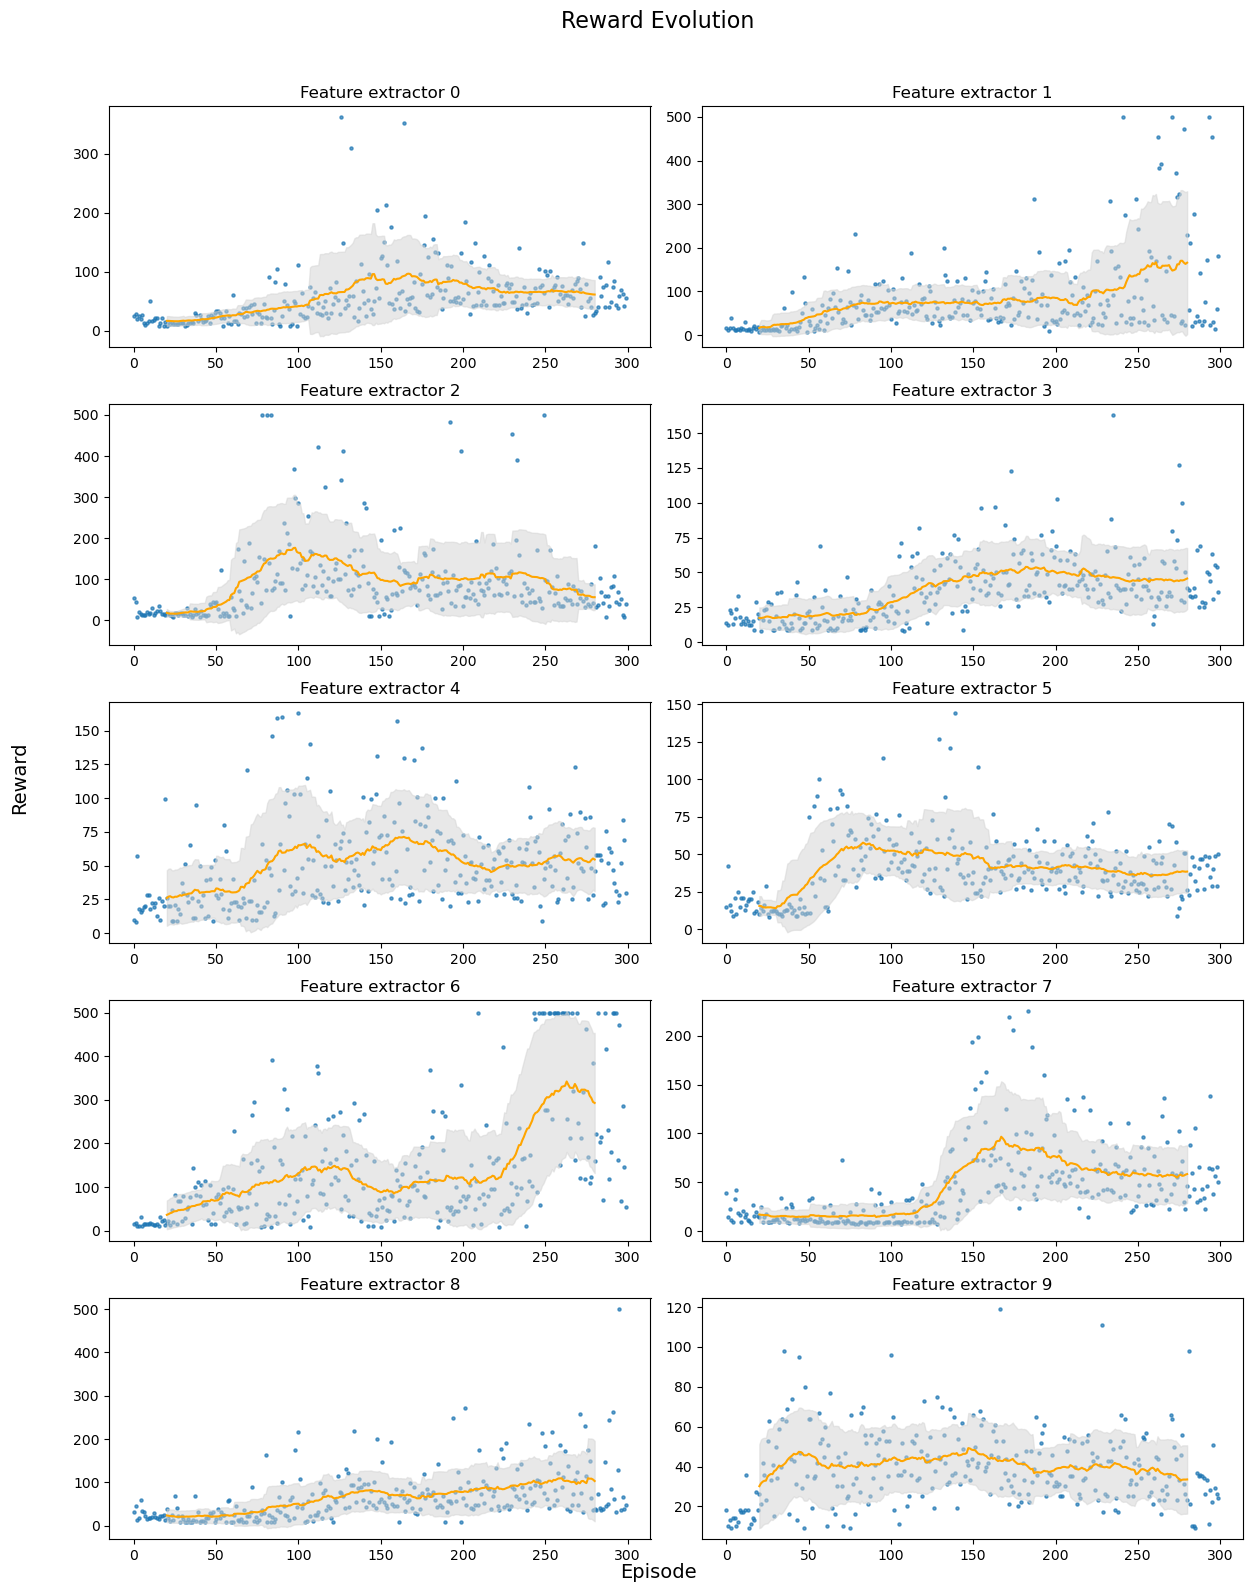

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=16)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, -0.0, 'Episode', ha='center', fontsize=14)  # X-axis label
fig.text(-0.04, 0.5, 'Reward', va='center', rotation='vertical', fontsize=14)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


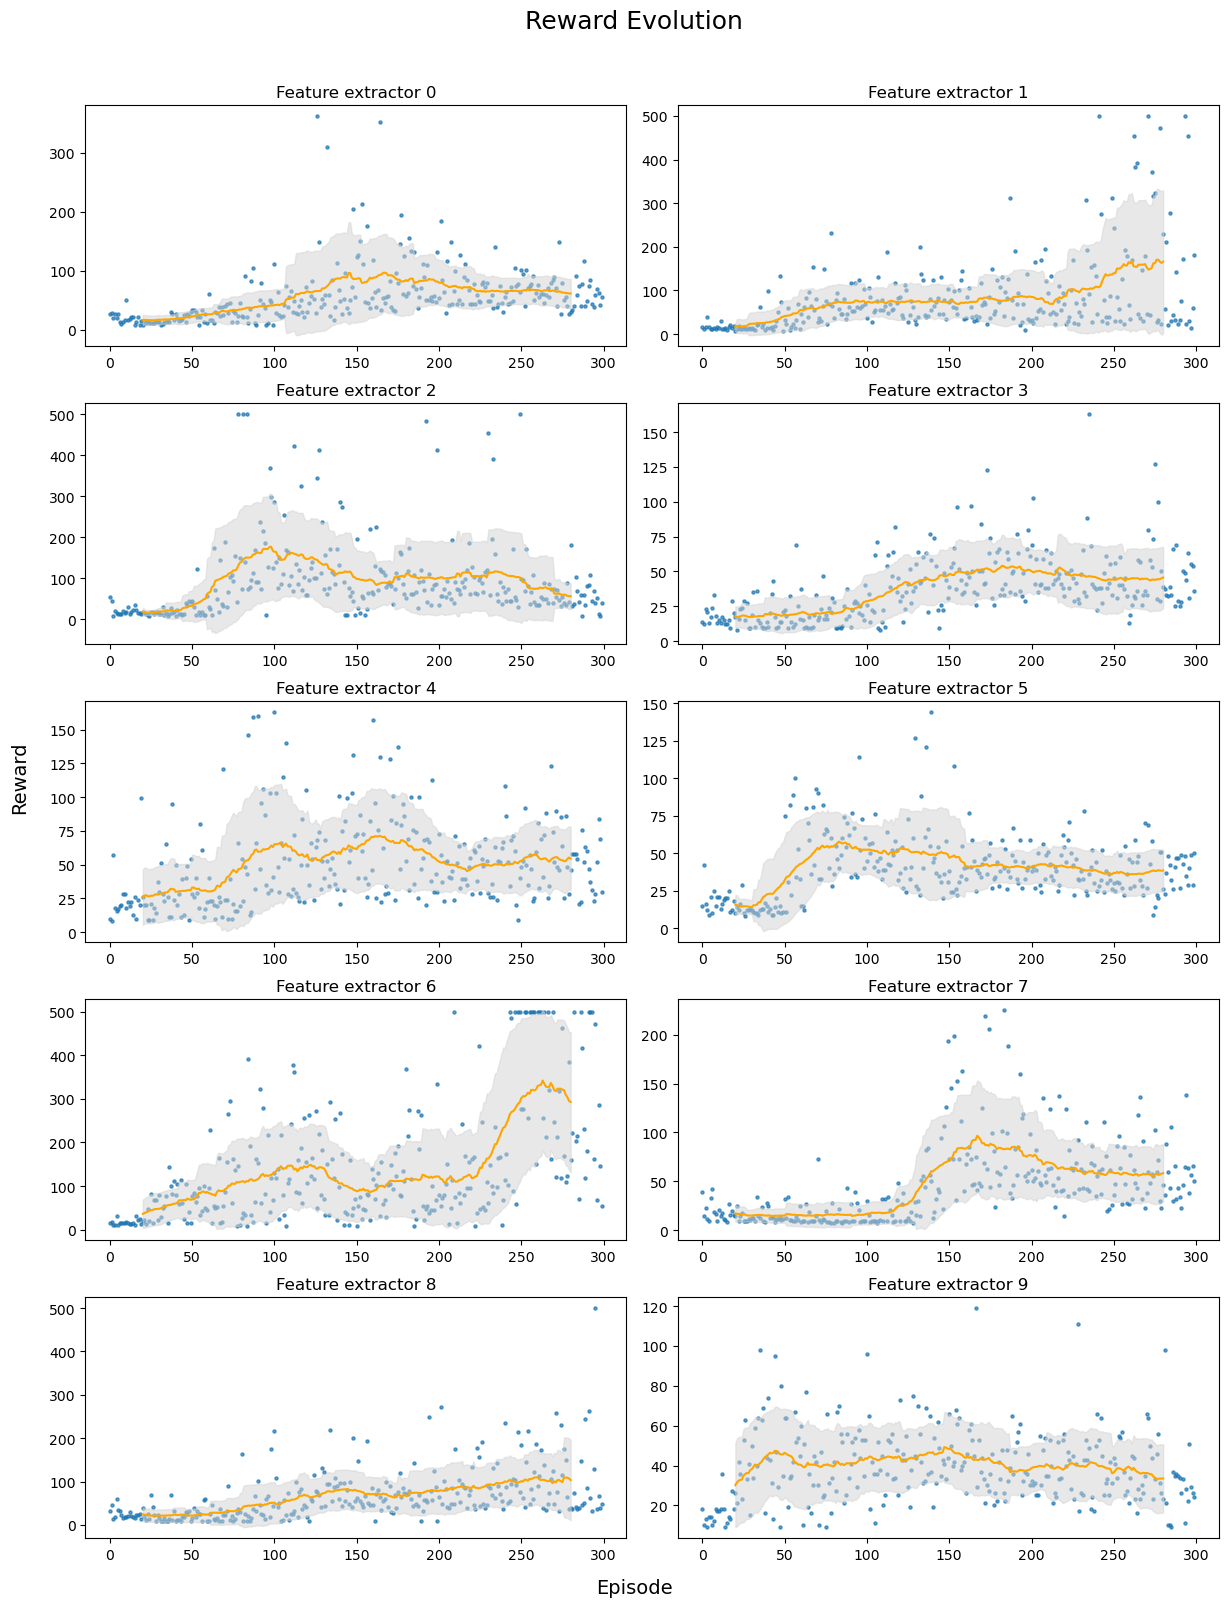

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
fig.suptitle("Reward Evolution", fontsize=18)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, -0.01, 'Episode', ha='center', fontsize=14)  # X-axis label
fig.text(-0.02, 0.5, 'Reward', va='center', rotation='vertical', fontsize=14)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


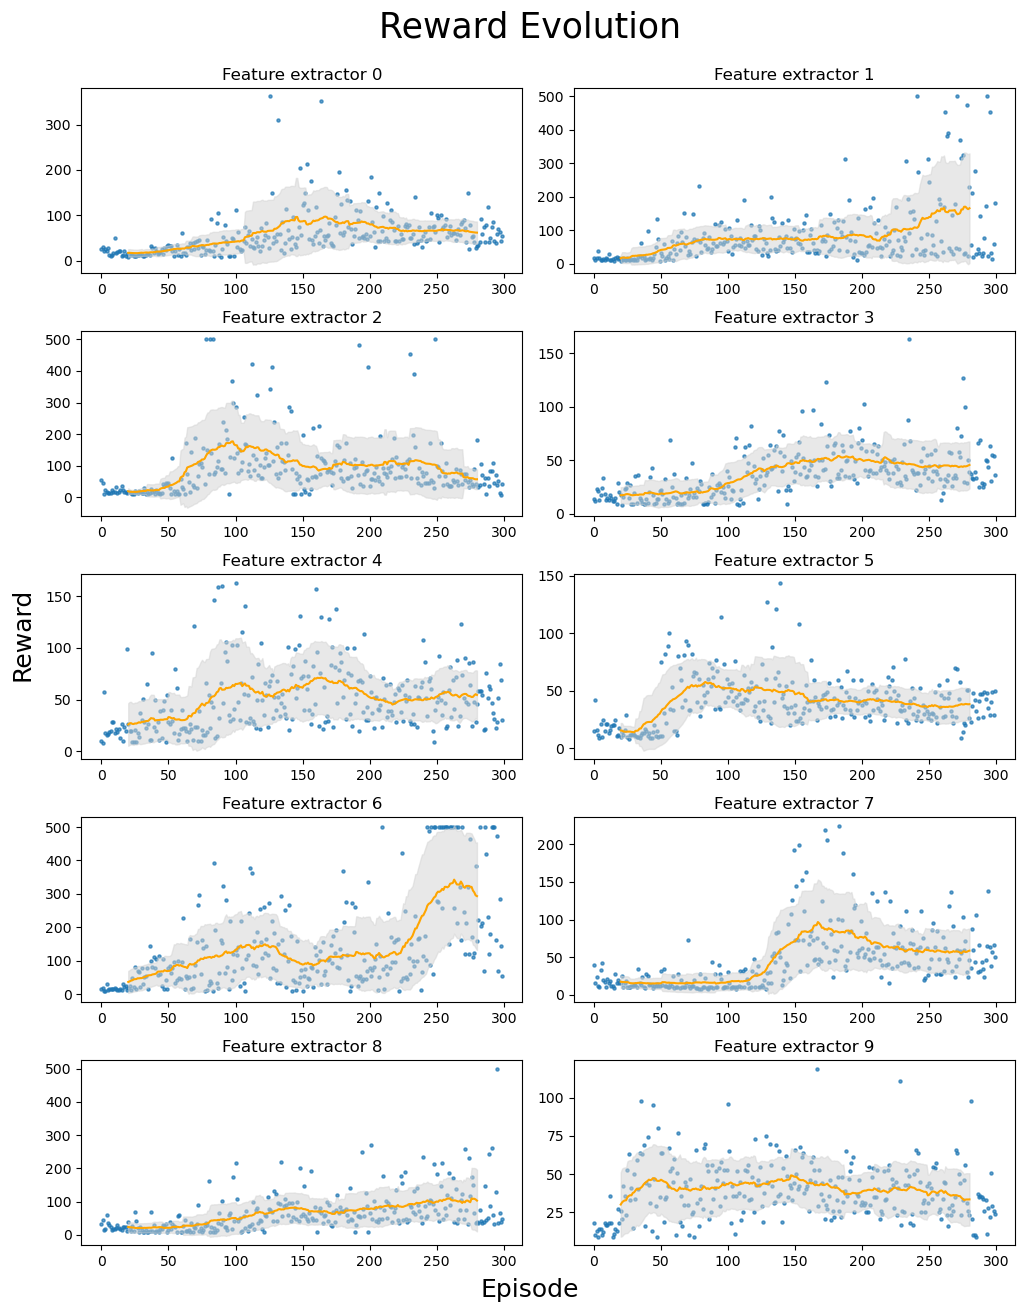

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(10, 13))
fig.suptitle("Reward Evolution", fontsize=25)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, -0.01, 'Episode', ha='center', fontsize=18)  # X-axis label
fig.text(-0.02, 0.5, 'Reward', va='center', rotation='vertical', fontsize=18)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


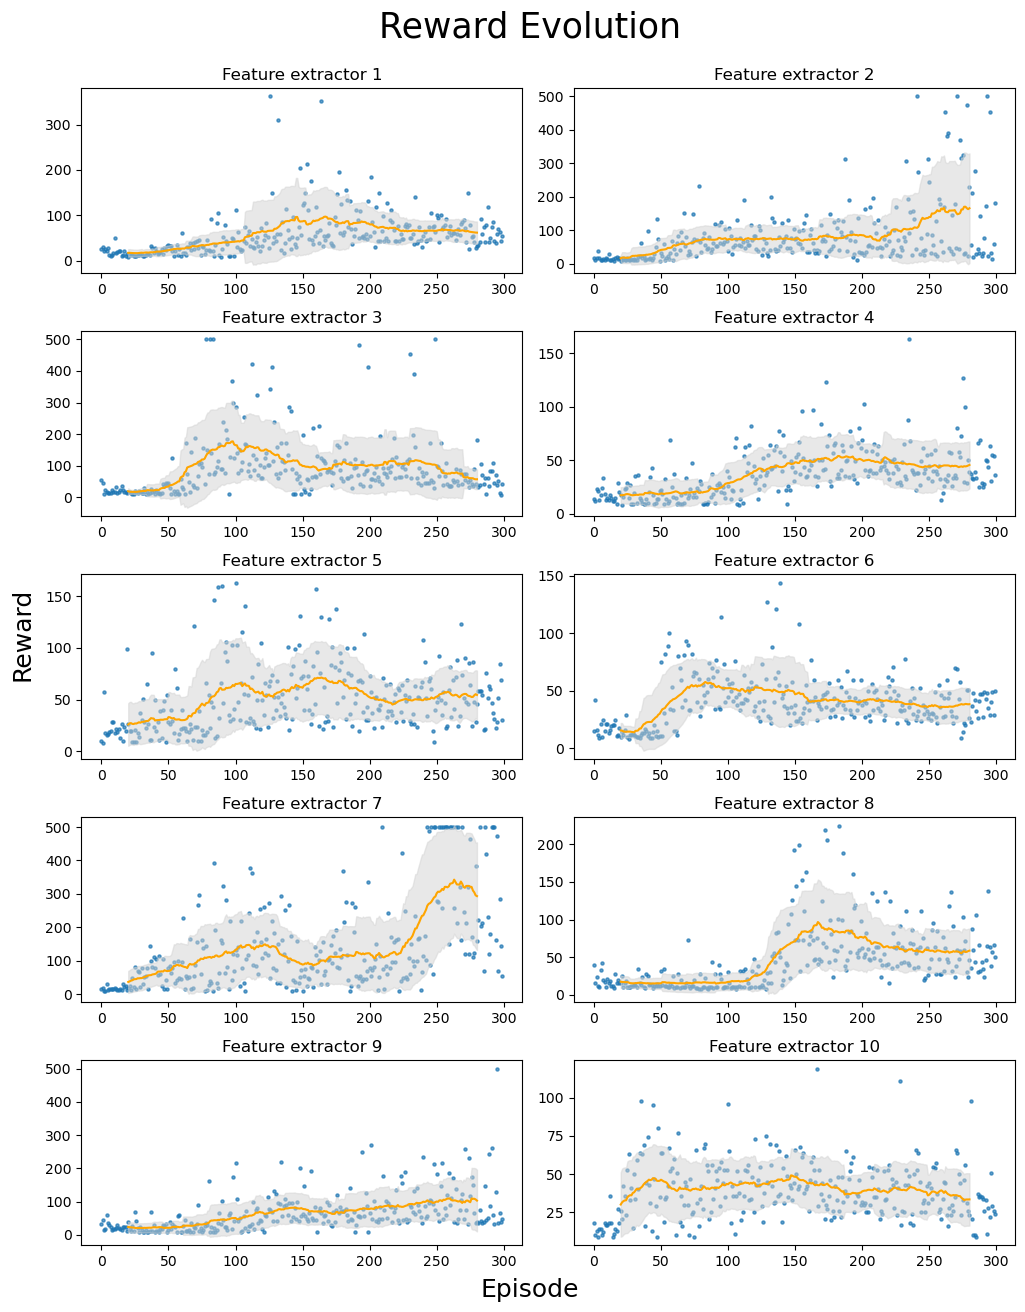

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for 10 reward plots
fig, axes = plt.subplots(5, 2, figsize=(10, 13))
fig.suptitle("Reward Evolution", fontsize=25)  # Increase the fontsize for the general title

# Set common x and y labels for the entire figure
fig.text(0.5, -0.01, 'Episode', ha='center', fontsize=18)  # X-axis label
fig.text(-0.02, 0.5, 'Reward', va='center', rotation='vertical', fontsize=18)  # Y-axis label

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Scatter plot for the individual reward values
    ax.scatter(combined_df['episode_R'], combined_df[f'reward_{i}'], s=5, label=f'Agent {i}', alpha=0.7)

    # Calculate the moving average with a window of 40 episodes
    moving_avg = combined_df[f'reward_{i}'].rolling(window=40, center=True).mean()

    # Calculate the moving standard deviation with a window of 40 episodes
    moving_std = combined_df[f'reward_{i}'].rolling(window=40, center=True).std()

    # Line plot for the moving average
    ax.plot(combined_df['episode_R'], moving_avg, label=f'Moving Avg', color='orange')

    # Fill between the moving average - moving standard deviation and the moving average + moving standard deviation
    ax.fill_between(combined_df['episode_R'], moving_avg - moving_std, moving_avg + moving_std, color='lightgray', alpha=0.5)

    ax.set_title(f'Feature extractor {i+1}', fontsize=12)  # Set title fontsize

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
